In [1]:
%matplotlib inline

In [2]:
print(__doc__)
%pylab
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd

import median_label

Automatically created module for IPython interactive environment
Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [3]:

h = .02  # step size in the mesh

#names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
#         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
#         "Naive Bayes", "QDA"]

names = ["Neural Net"]

classifiers = [MLPClassifier(alpha=1)]

"""
KNeighborsClassifier(3),
SVC(kernel="linear", C=0.025),
SVC(gamma=2, C=1),
GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
DecisionTreeClassifier(max_depth=5),
RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
AdaBoostClassifier(),
GaussianNB(),
QuadraticDiscriminantAnalysis()]
"""


'\nKNeighborsClassifier(3),\nSVC(kernel="linear", C=0.025),\nSVC(gamma=2, C=1),\nGaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),\nDecisionTreeClassifier(max_depth=5),\nRandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),\nAdaBoostClassifier(),\nGaussianNB(),\nQuadraticDiscriminantAnalysis()]\n'


# Classifier comparison


A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.



In [5]:
# data preparation
"""
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
"""

# load wordvector (features) here
X = np.load("docvec60000")
X = np.matrix(X)
X = StandardScaler().fit_transform(X)  # use this

# load volatility (labels) here
y_all = pd.read_csv("../nlp-forex-predict/fxdata/dataset60000aa.csv")
y_pair_names = list(y_all)[16]
print y_pair_names

# combine them and make dataset
dataset = dict()
for name in y_pair_names: #  loading of file works OK
    y_continuouse = np.asarray(y_all[name].tolist())
    y = median_label.median_label(y_continuouse)
    date = y_all["date"].tolist()
    dataset[name] = (X, y)
    

plot(y_continuouse)

['AUDJPY', 'AUDUSD', 'CHFJPY', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPUSD', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY']


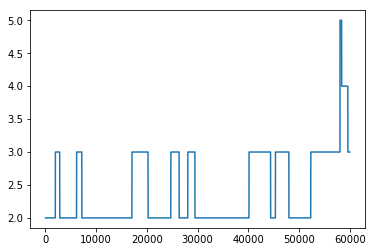

In [27]:
plot(y)

In [73]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
    
    #for visualisation
    """
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    """
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

NameError: name 'cm' is not defined

In [93]:
Y["AUDJPY"]

AttributeError: 'tuple' object has no attribute 'shape'

In [99]:
plot(y)